   Credit_Score  Annual_Income  Loan_Amount  Debt_to_Income_Ratio  \
0           402         126296        27473              0.250419   
1           735         101182        33625              0.689754   
2           570         102565        20504              0.992568   
3           406          49402        29089              0.165404   
4           371          24263        41487              0.169370   

   Number_of_Accounts  Late_Payments  Loan_Approved  
0                  16              0              1  
1                   5              0              1  
2                  17              0              1  
3                  10              4              0  
4                  18              9              0  
       Credit_Score  Annual_Income   Loan_Amount  Debt_to_Income_Ratio  \
count   1000.000000    1000.000000   1000.000000           1000.000000   
mean     563.991000   85596.120000  27678.348000              0.556703   
std      160.508436   37918.028486  127

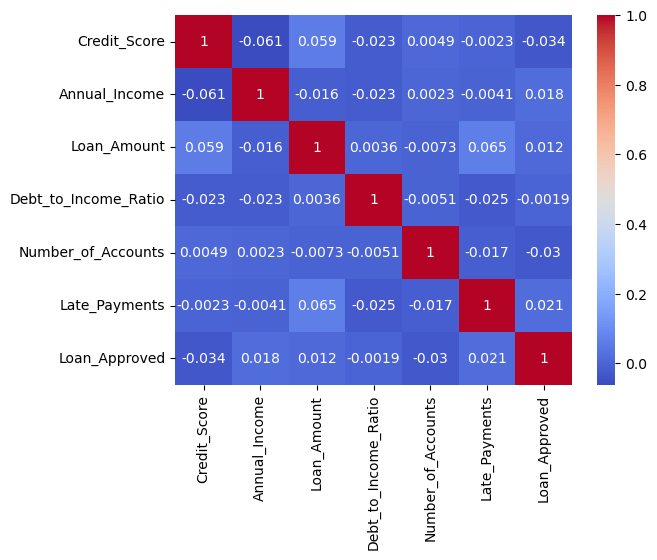

KeyError: 'target'

In [1]:
#(DAY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

data = pd.read_csv(r"C:\Users\madha\Downloads\Day 57 Support Vector Machines.csv")
print(data.head())
print(data.describe())
print(data.isnull().sum())

sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

y = data['target']
X = data.drop(columns=['target'])
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print(classification_report(y_test, y_pred_linear))

svm_poly = SVC(kernel='poly', probability=True)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print(classification_report(y_test, y_pred_poly))

svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print(classification_report(y_test, y_pred_rbf))

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
print(classification_report(y_test, y_pred_best))

accuracy = {
    "Linear": accuracy_score(y_test, y_pred_linear),
    "Polynomial": accuracy_score(y_test, y_pred_poly),
    "RBF": accuracy_score(y_test, y_pred_rbf),
    "Best Model": accuracy_score(y_test, y_pred_best)
}
print(accuracy)
